In [1]:
from gammapy.maps import Map
from astropy.coordinates import SkyCoord
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import pandas as pd


#Date: 19/10/01
#Time: 20:09:18.17 UT
#RA: 314.08 (+6.56 -2.26 deg 90% PSF containment) J2000
#Dec: 12.94 (+1.50 -1.47 deg 90% PSF containment) J2000

coor_nu = SkyCoord(ra = 314.08  ,dec = 12.94,unit = 'deg', frame = 'fk5')

##TDE
tde_ra = 314.262416 
tde_dec = 14.204515
coor_src = SkyCoord(ra = tde_ra,dec = tde_dec,unit = 'deg', frame = 'fk5')


#Create a WCS Map
m_wcs = Map.create(binsz=0.1145, map_type='wcs', skydir=coor_src, width=15.0)



In [2]:
from matplotlib import colors
import numpy as nm

__b_cdict={
        'red':((0.0,  0.0, 0.0),
               (0.25, 0.0, 0.0),
               (0.5,  1.0, 1.0),
               (1.0,  1.0, 1.0)),
        'green':((0.0,  0.0, 0.0),
                 (0.5,  0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0,  1.0, 1.0)),
        'blue':((0.0,  0.0, 0.0),
                (0.25, 1.0, 1.0),
                (0.5,  0.0, 0.0),
                (0.75, 0.0, 0.0),
                (1.0,  1.0, 1.0))
}
b = colors.LinearSegmentedColormap('b',__b_cdict,256)

cmap = b #mpl.cm.jet
cmap.set_under('k')
cmap.set_bad('k')

TypeError: 'dict_keys' object does not support item deletion

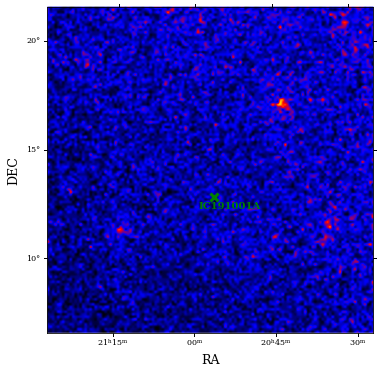

In [14]:
from functools import reduce
import operator
import math
m_wcs = Map.read('./data/TDE_countmap.fits', hdu='IMAGE')

source_name = 'AT2019dsg'
plt.rcParams['font.size']=12.5
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['figure.autolayout'] = True
fig, ax, im = m_wcs.plot(cmap=cmap,vmin = 0.,vmax = 16,interpolation = 'gaussian')
fig.set_size_inches(6,6)
ax.set_xlabel('RA',fontsize = 12.5)
ax.set_ylabel('DEC',fontsize = 12.5)
#ax.tick_params(axis='both', which='major', labelsize=30) #(axis='x',reset = True,labelsize=50)
import numpy as np
from matplotlib.patches import Polygon, Circle,Patch,Ellipse,Rectangle

ax.plot(coor_nu.ra.deg,coor_nu.dec.deg,marker = 'x',color = 'green',markersize = 8,mew = 3,transform=ax.get_transform('fk5'))
ax.text(coor_nu.ra.deg+0.75,coor_nu.dec.deg-0.5,'IC191001A',color = 'green',fontsize = 10,transform=ax.get_transform('fk5'),fontweight = 'bold')

data_roi = np.load('./data/LAT_G3_model.npy', allow_pickle=True, encoding="bytes").flat[0]

## Plot source positions
source_list = data_roi[b'sources'].keys()
del source_list['isodiff']
del source_list['galdiff']

for source_ in source_list:
    if 'TDE' in data_roi['sources'][source_]['name']: continue
    skydir_ = SkyCoord(ra = data_roi['sources'][source_]['ra'], dec = data_roi['sources'][source_]['dec'] ,unit = 'deg', frame = 'fk5')
    
    if skydir_.separation(coor_ehe_txs).deg < 15.:
        print(data_roi['sources'][source_]['name'], data_roi['sources'][source_]['ts'])
        if 'TDE' in data_roi['sources'][source_]['name']: continue
        if 'PS' in data_roi['sources'][source_]['name']:
            ps_name = data_roi['sources'][source_]['name'].replace('PS ','Fermi-')
            ax.text(data_roi['sources'][source_]['ra']+0.75,data_roi['sources'][source_]['dec']-0.5,ps_name,color = 'white',fontsize = 8,transform=ax.get_transform('fk5'),)


        if data_roi['sources'][source_]['ts'] < 25.: continue
        ax.plot(data_roi['sources'][source_]['ra'],data_roi['sources'][source_]['dec'],linewidth = 1.,color='white',transform=ax.get_transform('fk5'),marker = '+',markersize = 8,markeredgewidth = 1.)



cbar = plt.colorbar(im,cmap=cmap,label = 'Counts',ax = ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12.5)
cbar.set_label(label='Counts',fontsize=12.5)
#plt.title('LAT counts map',fontsize=14.5,pad = 15.,fontweight='bold')

##TDE
ax.text(coor_src.ra.deg+0.75,coor_src.dec.deg-0.5,source_name,color = 'white',fontsize = 10.,transform=ax.get_transform('fk5'),fontweight = 'bold')
ax.plot(coor_src.ra.deg,coor_src.dec.deg,linewidth = 1.,color='white',transform=ax.get_transform('fk5'),marker = '*',markersize = 8,markeredgewidth = 1.)


rect = Rectangle((coor_nu.ra.deg-2.26,coor_nu.dec.deg-1.47),6.56 +2.26 , +1.50 +1.47, angle=0.0,color = 'green',transform=ax.get_transform('fk5'),facecolor = 'None', label = 'IC-191001A 90% containment',fill = False,linewidth = 2.)
ax.add_patch(rect)

ax.set_xlim(0.,90.)
ax.set_ylim(10.,100.)
lon = ax.coords[0]
lat = ax.coords[1]
ax.legend(loc='upper left',fontsize = 10.)


lat.set_major_formatter('dd')
lon.set_major_formatter('dd')
plt.savefig('./plots/LAT_countsmap.pdf',bbox_inches='tight')



